<a href="https://colab.research.google.com/github/Scrollamos/histData_analysis/blob/main/Deeplearning_tensorflow_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf


In [ ]:
X = tf.range(-100,100,4)
y = X + 10

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, input_shape=[1], name='input_layer2'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='Model_one')

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(X_train, y_train, epochs=10, verbose=0)

In [ ]:
model.summary()

Model: "Model_one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 input_layer2 (Dense)        (None, 1)                 11        
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


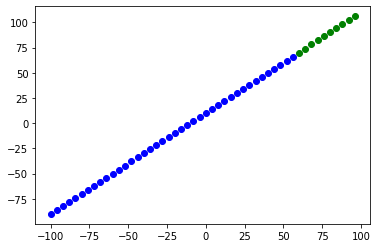

In [ ]:
#Visualize model
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color='b')
plt.scatter(X_test, y_test, color='g')

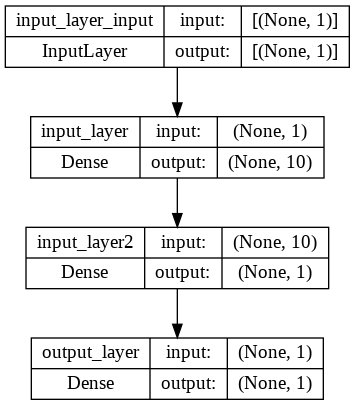

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

In [ ]:
###**Visualize our model predictions**
#To visualize predictions, it's a good idea to plot them against the ground truth labels.

#Often you'll see this in the form of 'y_test' or 'y_true' versus y_pred (ground truth versus your model predictions)
#Make some predicitons
y_pred = model.predict(X_test)
y_pred

NameError: ignored

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#lets create a plotting functions
import matplotlib.pyplot as plt
y_pred = 0
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='training data')
  #plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='test data')
  #plot models predictions in red
  plt.scatter(test_data, predictions, c='r', label='predictions')
  #show the legend
  plt.legend();
  


In [ ]:
#Evaluating our model's predictions with regression evaluation metrics

Depending on the problem youre working on, there will be different evasluation metrics to evaluate your models performance.
Since were working on a regression, the two main metrics:

*MAE - mean absolute error - A GREAT METRIC FOR ANY REGRESSION PROBLEM.
*MSE - mean square error, "square the average errors" - WHEN LARGER ERRORS ARE MORE SIGNIFICANT THAN SMALLER ERRORS.
*Huber - COMBINATION OF MSE and MAE. Less sensitive to outliers than MSE

In [ ]:
#Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 43ms/step - loss: 33.5931 - mae: 33.5931


[33.59312057495117, 33.59312057495117]

In [ ]:
track_sum = 0
for x in range(len(y_pred)):
  track_sum += y_test[x]-y_pred[x]

MAE = track_sum/len(y_pred)
print(MAE)

tf.Tensor([34.1], shape=(1,), dtype=float64)


In [ ]:
mae = tf.metrics.mean_absolute_error(y_test, tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([46.108734, 43.327484, 40.546238, 37.764988, 34.983738, 32.2025  ,
       29.42125 , 26.64    , 23.858757, 21.077507], dtype=float32)>

In [ ]:
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=33.59312>

In [ ]:
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

NameError: ignored

In [ ]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

In [ ]:
#Running experiments to improve our model

1. get more data - get more examples
2. make your model larger (using a more complex model) - more layers, more hidden unites
3. train for longer - give your model more of a chance to find patterns in the data

Lets do 3 modelling experiments:
1. Model 1 - same as the original model, 1 layer, trained 100 epochs.
2. model 2 - 2 layers, trained for 100 epochs
3. model 3 - 2 layers, trained for 500 epochs

In [ ]:
#import stuff
import tensorflow as tf
#from tensorflow.keras import layers
#inputs = layers.Input(shape(1,), dtype='string') #inputs are 1-dimensional strings
#x = text_vectorizer(inputs) #turn the input text into numbers
#x = embedding(x #create an embedding of the numerized numbers)
#x = layers.GlobalAveragePooling1D()(x)

X = tf.range(-100,100,4)
y = X + 10

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

#set random seed
tf.random.set_seed(42)

#1. create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

#fit the model
model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs=100)

In [ ]:
#lets create a plotting functions
import matplotlib.pyplot as plt
y_pred = 0
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='training data')
  #plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='test data')
  #plot models predictions in red
  plt.scatter(test_data, predictions, c='r', label='predictions')
  #show the legend
  plt.legend();
  


In [ ]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1).numpy()
mse_1 = mse(y_test, y_preds_1).numpy()
mae_1, mse_1

NameError: ignored

In [ ]:
#import stuff
import tensorflow as tf
#from tensorflow.keras import layers
#inputs = layers.Input(shape(1,), dtype='string') #inputs are 1-dimensional strings
#x = text_vectorizer(inputs) #turn the input text into numbers
#x = embedding(x #create an embedding of the numerized numbers)
#x = layers.GlobalAveragePooling1D()(x)

X = tf.range(-100,100,4)
y = X + 10

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

#set random seed
tf.random.set_seed(42)

#1. create model 2 layers, 100 epochs
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

#3. fit model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

#Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
#Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2).numpy()
mse_2 = mse(y_test, y_preds_2).numpy()
mae_2, mse_2

(3.19694, 13.070127)

1/1 [==============================] - 0s 39ms/step


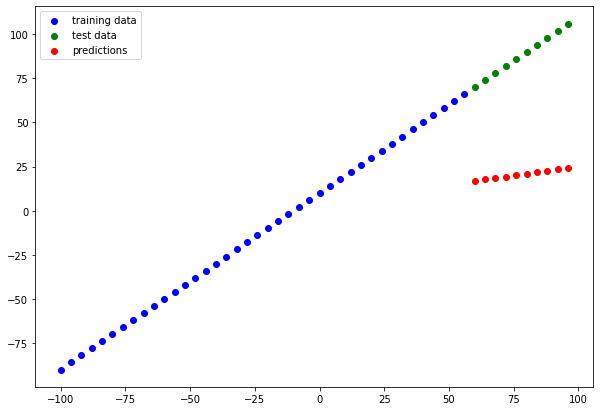

In [ ]:
#import stuff
import tensorflow as tf
#from tensorflow.keras import layers
#inputs = layers.Input(shape(1,), dtype='string') #inputs are 1-dimensional strings
#x = text_vectorizer(inputs) #turn the input text into numbers
#x = embedding(x #create an embedding of the numerized numbers)
#x = layers.GlobalAveragePooling1D()(x)

X = tf.range(-100,100,4)
y = X + 10

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

#set random seed
tf.random.set_seed(42)


#Lets build model 3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(19),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

#Make plot predictions of model_3 using the function we previously defined
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

mae_3 = mae(y_test, y_preds_3).numpy()
mse_3 = mse(y_test, y_preds_3).numpy()

🔑You want to start with small experiments and make sure they work. And then increase the scale when necessary.

In [ ]:
#Results were shit because we ran it for way too long.

#Now, comparing the results of our experiments
#Compare our models results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results



NameError: ignored

It looks like "model_2" performed the best...

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


🔑**One of your main goals should be to minimize the time between your experiments. The more experiments you do the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember machine learning practioner's motto: EXPERIMENT, EXPERIMENT, EXPERIMENT

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lkots of experiments.

Luckily, there are tools to help us.

In [ ]:
## Tracking your experiments

&&

#Saving our models

In [ ]:
##Saving our models allows us to use them outside of google colab
model_2.save("first_model")

In [ ]:
#saving but in hdf5 format
model_2.save("first_model_h5.h5")

In [ ]:
#Checking if it was saved correctly
load_model_2_format =  tf.keras.models.load_model("/content/first_model")
load_model_2_format.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compare model_2 predictions with the saved model predictions
model_2_preds = model_2.predict(X_test)
load_model_2_format = load_model_2_format.predict(X_test)
model_2_preds == load_model_2_format

1/1 [==============================] - 0s 174ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model_2_preds, load_model_2_format
mae(y_test, model_2_preds) == mae(y_test, load_model_2_format)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
#entao why is it saying iz false, (its working for me, se nao tivesse, fazia squeeze lol)
#Now, load using .h5
load_h5_model = tf.keras.models.load_model("/content/first_model_h5.h5")

#Compare model_2 predictions with the saved model predictions
model_2_preds = model_2.predict(X_test)
load_model_2_format_h5 = load_h5_model.predict(X_test)
model_2_preds == load_model_2_format_h5

1/1 [==============================] - 0s 82ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#Code to download a file from google colab
from google.colab import files
files.download("/content/first_model_h5.h5")

#or save it to google drive
!cp /content/first_model_h5.h5 /content/drive/MyDrive/tensorflow_course

!ls /content/drive/MyDrive/tensorflow_course


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/drive/MyDrive/tensorflow_course


### A LARGER EXAMPLE

In [ ]:
X_train, y_train

In [ ]:
#DIA 10
import numpy as np
X = np.arange(-100,100,4)
y = X + 10
X,y

import tensorflow as tf
tf.random.set_seed(42)

X_train = X[:40]
y_train = X[:40]

X_test = X[40:]
y_test = X[40:]

In [1]:
#import requried libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

#A dependent variable são as charges
#as independent variables são age, sex, bmi, etc


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
#Lets one hot encode (tenho mais do que uma categorical variable)
pd.get_dummies(insurance)
insurance = pd.get_dummies(insurance)
insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [5]:
insurance = insurance.astype(float)
insurance.dtypes
insurance

X = insurance.drop('charges', axis=1)
y = insurance['charges']

In [9]:
#Create the training datasets the pro way
#using "scikitlearn train test split"
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [26]:
#Now we can build the model
tf.random.set_seed(42)
#1. create the model
model_insurance = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile the model
model_insurance.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

#3. fit the model
history = model_insurance.fit(X_train, y_train, epochs=100, verbose=0)

In [18]:
#Evaluate the model
model_insurance.evaluate(X_test, y_test)
y_train.median(), y_train.mean()

9/9 [==============================] - 0s 2ms/step - loss: 4924.4956 - mae: 4924.4956


(9575.4421, 13346.089736364485)

# Lets improve our model

In [19]:
#evaluate the model
model_insurance.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.4956 - mae: 4924.4956


[4924.49560546875, 4924.49560546875]

In [28]:
#Set random seed
tf.random.set_seed(42)

#1. create modiel
model_insurance_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. compile
model_insurance_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

#.3 fit model
history = model_insurance_2.fit(X_train, y_train, epochs=200, verbose=0)

In [23]:
#evaluate our third model
model_insurance_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3488.7854 - mae: 3488.7856


[3488.785400390625, 3488.78564453125]

Text(0.5, 0, 'epochs')

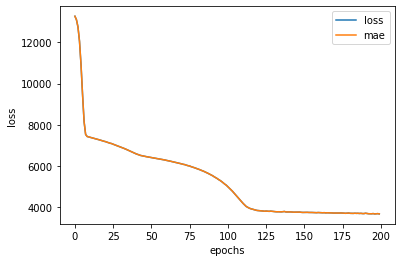

In [30]:
#Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

** How long should you train for? **

IT DEPENDS. Tensorflow has a solution, "early stopping callback"